# Recursos

## Explorando el dataset

In [1]:
# Libraries setup
import pandas as pd
import matplotlib.pyplot as plt
import ast
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [2]:
starting = '2012-01-01'
ending = '2019-05-31'
url = 'https://alac.funde.org/api/v1/complains?startdate={}&enddate={}&page=0&limit=10000'.format(starting, ending)
print(url)

https://alac.funde.org/api/v1/complains?startdate=2012-01-01&enddate=2019-05-31&page=0&limit=10000


In [3]:
data = pd.read_json(url)

In [4]:
data.shape

(78, 18)

In [5]:
data.columns

Index(['_id', 'case_id', 'comment', 'date', 'detail', 'documents', 'finish',
       'office', 'office_id', 'overview', 'ref', 'result', 'reviewer',
       'reviewer_id', 'start', 'status', 'updates', 'url'],
      dtype='object')

In [6]:
## Creating a new attribute: month
data['month'] = data.date.apply(lambda x: str(x)[:7])

In [7]:
data.to_csv('input/complains.csv', index=False)

## Recursos por mes

In [8]:
data = pd.read_csv('input/complains.csv')
aux = data.groupby(['month', 'status']).count()['_id'].reset_index()
by_month = pd.crosstab(aux.month, aux.status, aux._id, aggfunc=sum).fillna(0)

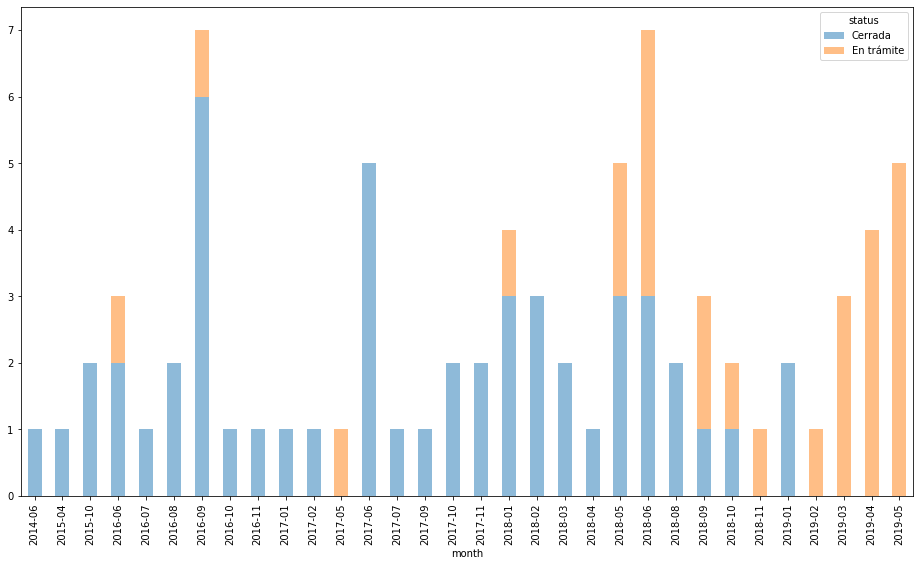

In [9]:
ax = by_month.plot(kind='bar', stacked=True, figsize=(16,9), alpha=0.5)

In [10]:
by_month['Total'] = by_month['Cerrada'] + by_month['En trámite']
by_month

status,Cerrada,En trámite,Total
month,,,
2014-06,1.0,0.0,1.0
2015-04,1.0,0.0,1.0
2015-10,2.0,0.0,2.0
2016-06,2.0,1.0,3.0
2016-07,1.0,0.0,1.0
2016-08,2.0,0.0,2.0
2016-09,6.0,1.0,7.0
2016-10,1.0,0.0,1.0
2016-11,1.0,0.0,1.0


In [11]:
by_month.sum()

status
Cerrada       51.0
En trámite    27.0
Total         78.0
dtype: float64

## Tipo de resultados

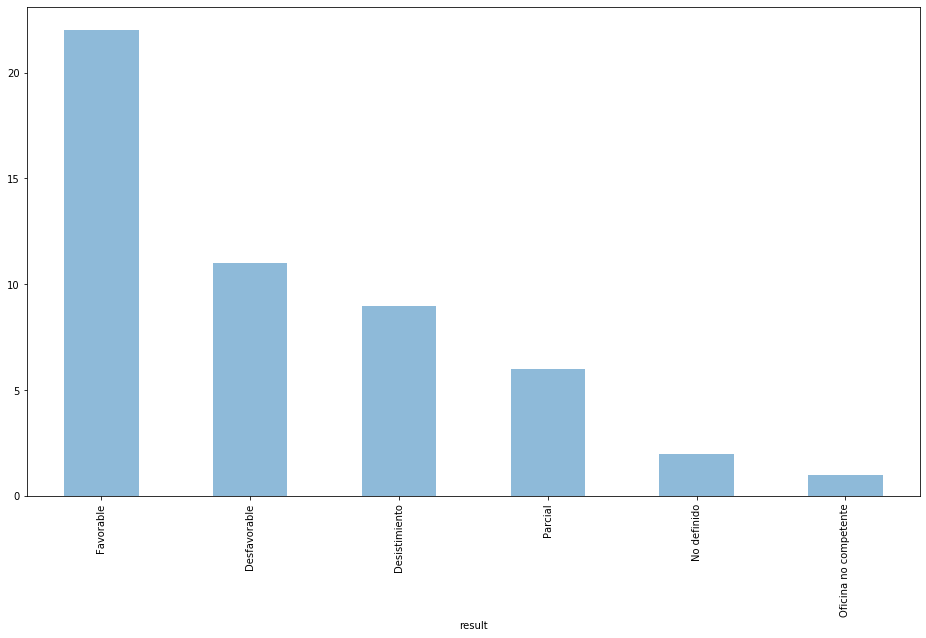

In [12]:
by_result = data[data.status == 'Cerrada'].groupby('result').count()['_id'].sort_values(ascending=False)
by_result.plot(kind='bar', figsize=(16,9), alpha=0.5)

In [13]:
by_result.sum()

51

In [14]:
pd.DataFrame(by_result)

,_id
result,
Favorable,22
Desfavorable,11
Desistimiento,9
Parcial,6
No definido,2
Oficina no competente,1


## Oficinas

In [15]:
aux = data.groupby(['office', 'status']).count()['_id'].reset_index()
by_office = pd.crosstab(aux.office, aux.status, aux._id, aggfunc=sum).fillna(0)
by_office['Total'] = by_office['Cerrada'] + by_office['En trámite']
by_office = by_office.sort_values('Total', ascending=False)

In [16]:
by_office[0:25]

status,Cerrada,En trámite,Total
office,,,
Presidencia de la República,7.0,2.0,9.0
Universidad de El Salvador,3.0,4.0,7.0
Asamblea Legislativa,4.0,2.0,6.0
Ministerio de Relaciones Exteriores,5.0,1.0,6.0
Organo Judicial y Corte Suprema de Justicia,4.0,1.0,5.0
Ministerio de Hacienda,3.0,2.0,5.0
Ministerio de Educación,3.0,1.0,4.0
Comisión Ejecutiva Portuaria Autonóma,1.0,3.0,4.0
Policía Nacional Civil,2.0,0.0,2.0


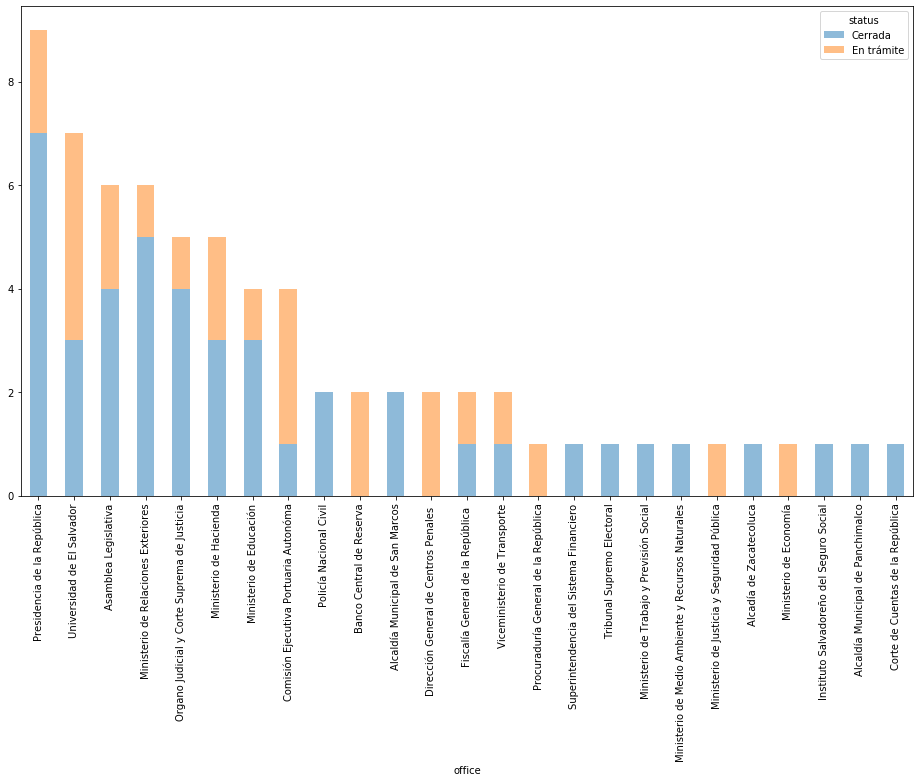

In [17]:
by_office[0:25][['Cerrada', 'En trámite']].plot(kind='bar', stacked=True, figsize=(16,9), alpha=0.5)

In [18]:
by_office.reset_index().office.to_csv('offices.csv', index=False, header=True)

In [19]:
sp = pd.read_csv('sector_programs.csv')
sp.head()

,office,sector,program,function
0,Alcaldía de San Salvador,Municipalidades,Municipalidades,Desarrollo territorial
1,Academia Nacional de Seguridad Pública,Ejecutivo,Descentralizadas,Seguridad y justicia
2,Administración Nacional de Acueductos y Alcant...,Ejecutivo,Descentralizadas,Desarrollo social
3,Alcadía de Zacatecoluca,Municipalidades,Municipalidades,Desarrollo territorial
4,Alcaldía Municipal de Ahuachapán,Municipalidades,Municipalidades,Desarrollo territorial


In [20]:
by_office = sp.merge(by_office, on='office')

In [21]:
by_program = by_office.groupby('program').sum().sort_values('Total', ascending=False)
by_program

,Cerrada,En trámite,Total
program,,,
Gob. Central,30.0,14.0,44.0
Descentralizadas,6.0,7.0,13.0
Municipalidades,9.0,2.0,11.0
Legislativo,4.0,2.0,6.0
Financieras,0.0,2.0,2.0


In [22]:
by_program / by_program.sum().sum() * 100

,Cerrada,En trámite,Total
program,,,
Gob. Central,19.736842,9.210526,28.947368
Descentralizadas,3.947368,4.605263,8.552632
Municipalidades,5.921053,1.315789,7.236842
Legislativo,2.631579,1.315789,3.947368
Financieras,0.000000,1.315789,1.315789


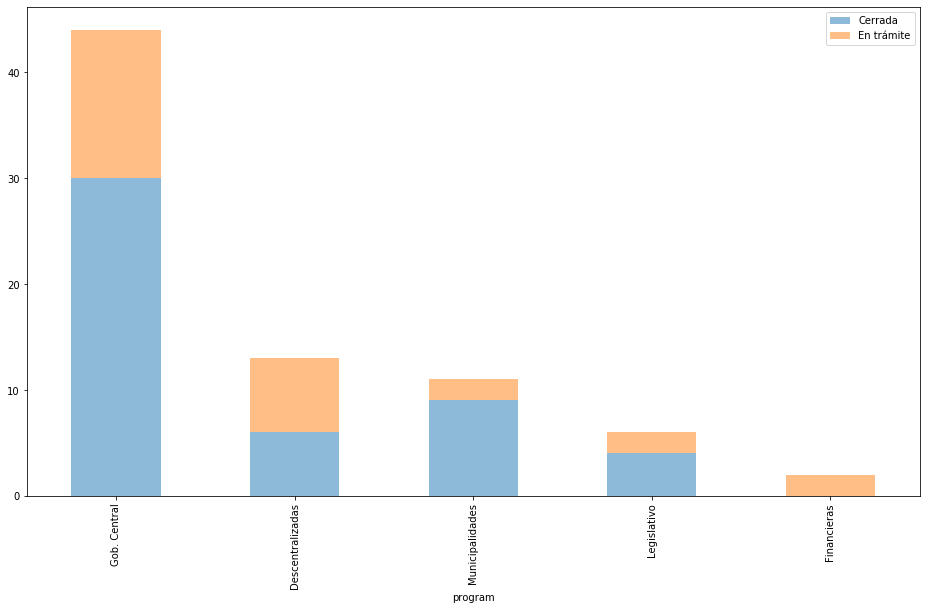

In [23]:
by_program[['Cerrada', 'En trámite']].plot(kind='bar', stacked=True, figsize=(16,9), alpha=0.5)

In [24]:
by_sector = by_office.groupby('sector').sum().sort_values('Total', ascending=False)
by_sector

,Cerrada,En trámite,Total
sector,,,
Ejecutivo,29.0,20.0,49.0
Municipalidades,9.0,2.0,11.0
Judicial,5.0,3.0,8.0
Legislativo,4.0,2.0,6.0
Org. Control,2.0,0.0,2.0


In [25]:
by_sector / by_sector.sum().sum() * 100

,Cerrada,En trámite,Total
sector,,,
Ejecutivo,19.078947,13.157895,32.236842
Municipalidades,5.921053,1.315789,7.236842
Judicial,3.289474,1.973684,5.263158
Legislativo,2.631579,1.315789,3.947368
Org. Control,1.315789,0.000000,1.315789


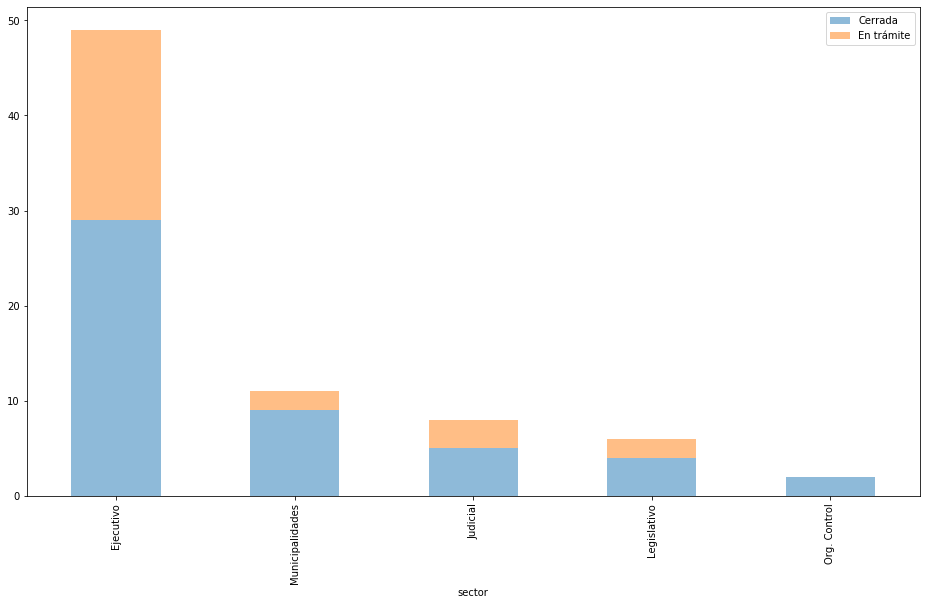

In [26]:
by_sector[['Cerrada', 'En trámite']].plot(kind='bar', stacked=True, figsize=(16,9), alpha=0.5)

In [27]:
by_function = by_office.groupby('function').sum().sort_values('Total', ascending=False)
by_function

,Cerrada,En trámite,Total
function,,,
Conducción,21.0,7.0,28.0
Seguridad y justicia,7.0,6.0,13.0
Desarrollo económico,5.0,7.0,12.0
Desarrollo social,7.0,5.0,12.0
Desarrollo territorial,9.0,2.0,11.0


In [28]:
by_function / by_function.sum().sum() * 100

,Cerrada,En trámite,Total
function,,,
Conducción,13.815789,4.605263,18.421053
Seguridad y justicia,4.605263,3.947368,8.552632
Desarrollo económico,3.289474,4.605263,7.894737
Desarrollo social,4.605263,3.289474,7.894737
Desarrollo territorial,5.921053,1.315789,7.236842


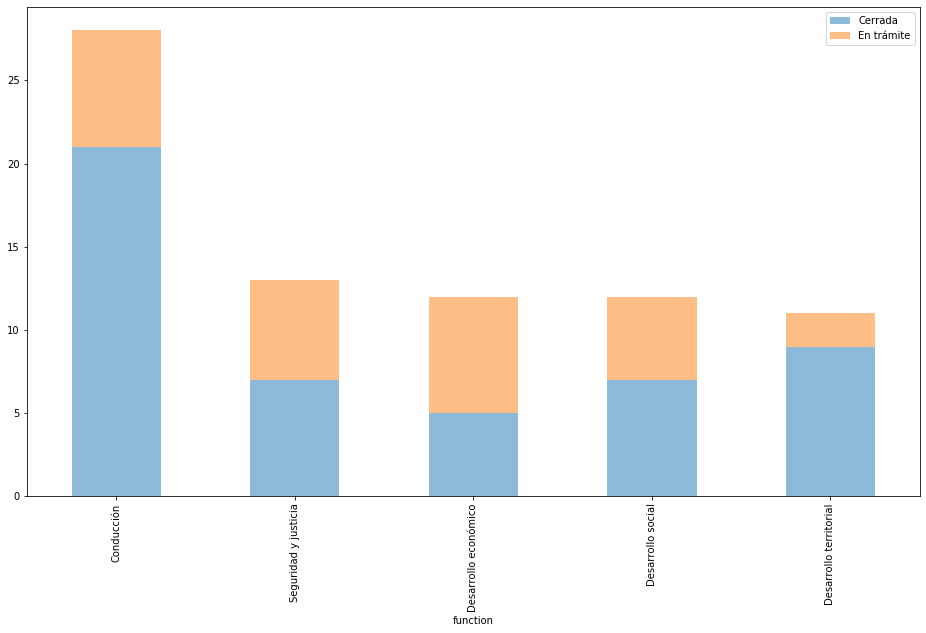

In [29]:
by_function[['Cerrada', 'En trámite']].plot(kind='bar', stacked=True, figsize=(16,9), alpha=0.5)

In [30]:
aux = data.groupby(['reviewer', 'status']).count()['_id'].reset_index()
by_reviewer = pd.crosstab(aux.reviewer, aux.status, aux._id, aggfunc=sum).fillna(0)
by_reviewer['Total'] = by_reviewer['Cerrada'] + by_reviewer['En trámite']
by_reviewer = by_reviewer.groupby('reviewer').sum().sort_values('Total', ascending=False)
by_reviewer

status,Cerrada,En trámite,Total
reviewer,,,
Instituto de Acceso a la Información Pública,47.0,17.0,64.0
Instituto de Acceso a la Información Pública (Recepción de denuncias),2.0,3.0,5.0
Tribunal de Ética Gubernamental,0.0,4.0,4.0
Corte de Cuentas de la República,1.0,2.0,3.0
Autoridad de Aviación Civil de El Salvador,1.0,1.0,2.0


## Acciones

In [31]:
aux = []
for idx in range(len(data)):
    row = data.iloc[idx]
    upd = ast.literal_eval(row.updates)
    for el in upd:
        el['url'] = row.url
        el['title'] = row.overview
        el['office'] = row.office
        aux.append(el)

In [32]:
data['actions'] = data['updates'].apply(ast.literal_eval).apply(lambda x: len(x))

In [33]:
updates = pd.DataFrame(aux)
updates['month'] = updates.date.apply(lambda x: str(x)[:7])
updates = updates[updates.month <= ending]
updates.head()

,date,detail,office,title,url,month
0,2016-09-01,Apelación remitida al IAIP,Centro Nacional de Registros,Pago de aranceles en CNR por copias de balances,https://alac.funde.org/complains/57c890b9ab3ab...,2016-09
1,2016-09-01,Acuse de recibido del IAIP,Centro Nacional de Registros,Pago de aranceles en CNR por copias de balances,https://alac.funde.org/complains/57c890b9ab3ab...,2016-09
2,2016-09-30,El recurso de apelación fue admitido,Centro Nacional de Registros,Pago de aranceles en CNR por copias de balances,https://alac.funde.org/complains/57c890b9ab3ab...,2016-09
3,2017-02-08,Se recibió señalamiento de audiencia oral: Feb...,Centro Nacional de Registros,Pago de aranceles en CNR por copias de balances,https://alac.funde.org/complains/57c890b9ab3ab...,2017-02
4,2018-01-23,Se remitió escrito al IAIP para consultar sobr...,Centro Nacional de Registros,Pago de aranceles en CNR por copias de balances,https://alac.funde.org/complains/57c890b9ab3ab...,2018-01


In [34]:
upd_by_month = updates.groupby('month').count()['detail']
upd_by_month

month
2016-06     2
2016-07     3
2016-08     6
2016-09    21
2016-10    16
2016-11     6
2016-12     3
2017-01     4
2017-02    15
2017-03     5
2017-04     1
2017-05    11
2017-06    27
2017-07    26
2017-08     1
2017-09     5
2017-10     7
2017-11     8
2017-12     6
2018-01    26
2018-02    14
2018-03    15
2018-04     7
2018-05    18
2018-06    28
2018-07    27
2018-08    21
2018-09    24
2018-10    12
2018-11    20
2018-12    10
2019-01    19
2019-02     7
2019-03    15
2019-04    15
2019-05    25
Name: detail, dtype: int64

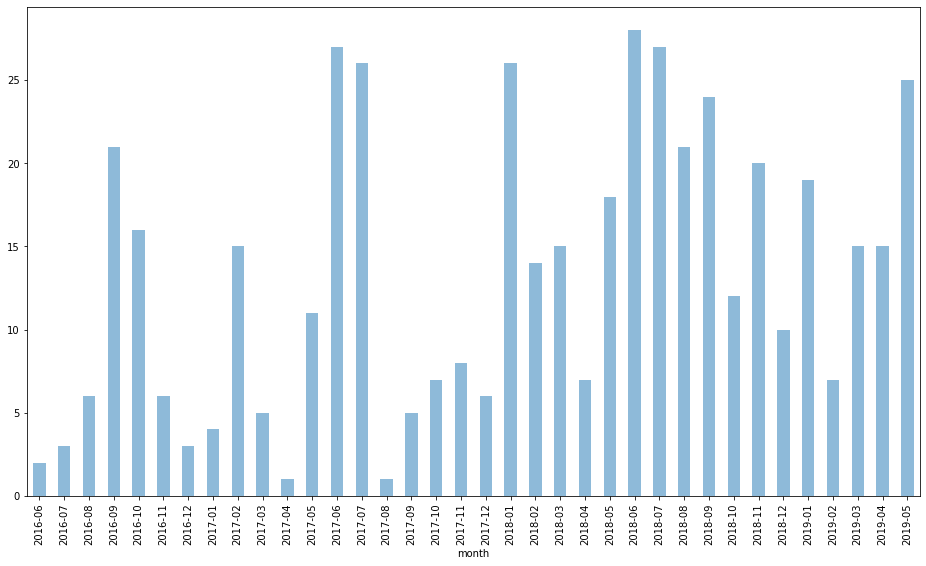

In [35]:
upd_by_month.plot(kind='bar', figsize=(16,9), alpha=0.5)

In [36]:
by_month_summ = by_month.merge(upd_by_month, on='month').rename(columns={'detail': 'Acciones'})
by_month_summ

,Cerrada,En trámite,Total,Acciones
month,,,,
2016-06,2.0,1.0,3.0,2
2016-07,1.0,0.0,1.0,3
2016-08,2.0,0.0,2.0,6
2016-09,6.0,1.0,7.0,21
2016-10,1.0,0.0,1.0,16
2016-11,1.0,0.0,1.0,6
2017-01,1.0,0.0,1.0,4
2017-02,1.0,0.0,1.0,15
2017-05,0.0,1.0,1.0,11


In [37]:
by_month_summ.sum()

Cerrada        47.0
En trámite     27.0
Total          74.0
Acciones      423.0
dtype: float64

## Pronósticos

In [38]:
by_day = updates.groupby('date').count()['detail'].reset_index()
by_day.rename(columns={'date': 'ds', 'detail': 'y'}, inplace=True)
by_day.head()

,ds,y
0,2017-05-03,1
1,2017-06-06,6
2,2017-06-22,3
3,2017-06-26,6
4,2017-07-03,1


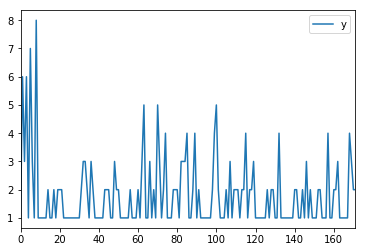

In [39]:
by_day.plot()

In [40]:
m = Prophet()
m.fit(by_day)

/usr/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)

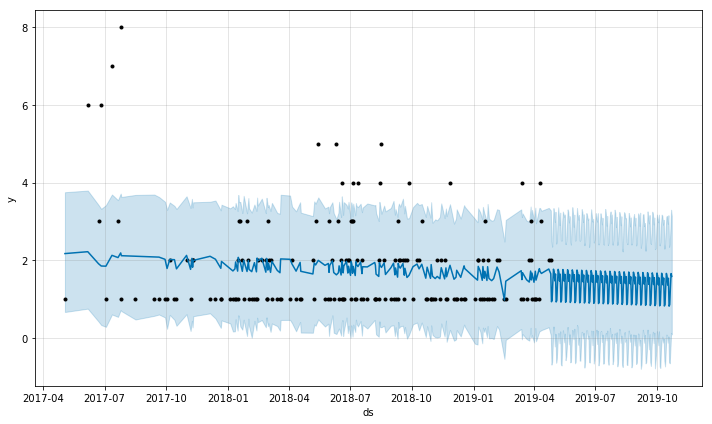

In [42]:
f = m.plot(forecast)

In [44]:
f.savefig('forecast_complains.png')

## Resumen general

In [38]:
data.columns

Index(['_id', 'case_id', 'comment', 'date', 'detail', 'documents', 'finish',
       'office', 'office_id', 'overview', 'ref', 'result', 'reviewer',
       'reviewer_id', 'start', 'status', 'updates', 'url', 'month', 'actions'],
      dtype='object')

In [39]:
data[['date', 'overview', 'office', 'reviewer', 'status', 'result', 'actions', 'url']].to_csv('output/complains.csv', index=False)

In [40]:
updates['detail'] = updates['detail'].apply(lambda x: str(x).replace('\n', ' ').replace('\r', ''))

In [41]:
updates[['date', 'office', 'title', 'detail', 'url']].sort_values('date').to_csv('output/complains_actions.csv', index=False)